### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('/Users/luzejames/Documents/Python/Git/assignment5_1_starter/data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
data.shape[0]
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
# Look at the percentages of data missing, compared against the total number of records
print('Percentage of Missing Records')
print('Car:', f"{(data['car'].isnull().sum() * 100)/ data.shape[0]:.2f}%")
print('Bar:', f"{(data['Bar'].isnull().sum() * 100)/ data.shape[0]:.2f}%")
print('CoffeeHouse:', f"{(data['CoffeeHouse'].isnull().sum() * 100)/ data.shape[0]:.2f}%")
print('CarryAway:', f"{(data['CarryAway'].isnull().sum() * 100)/ data.shape[0]:.2f}%")
print('RestaurantLessThan20:', f"{(data['RestaurantLessThan20'].isnull().sum() * 100)/ data.shape[0]:.2f}%")
print('Restaurant20To50:', f"{(data['Restaurant20To50'].isnull().sum() * 100)/ data.shape[0]:.2f}%")


Percentage of Missing Records
Car: 99.15%
Bar: 0.84%
CoffeeHouse: 1.71%
CarryAway: 1.19%
RestaurantLessThan20: 1.02%
Restaurant20To50: 1.49%


In [18]:
# Drop the car column since it contains too many records without information.
data = data.drop(columns=['car'])

In [20]:
# Replace the cells that contain null values with the most repeated value in each one of the following columns

data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().idxmax())#never
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().idxmax()) #less1
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().idxmax())   #1~3
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().idxmax())   #1~3
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().idxmax())



4. What proportion of the total observations chose to accept the coupon?



In [23]:
# Create a new Dataframe that contains only the records of people that accepted the coupon

data_accept = data[data['Y']==1]
# Count number of people that accepted
accepted_coupon = len(data_accept)
# Get the percentage
acceptance_percentage = (accepted_coupon * 100)/data.shape[0]

print(f"A total of {acceptance_percentage:.2f}% accepted a coupon")


A total of 56.84% accepted a coupon


5. Use a bar plot to visualize the `coupon` column.

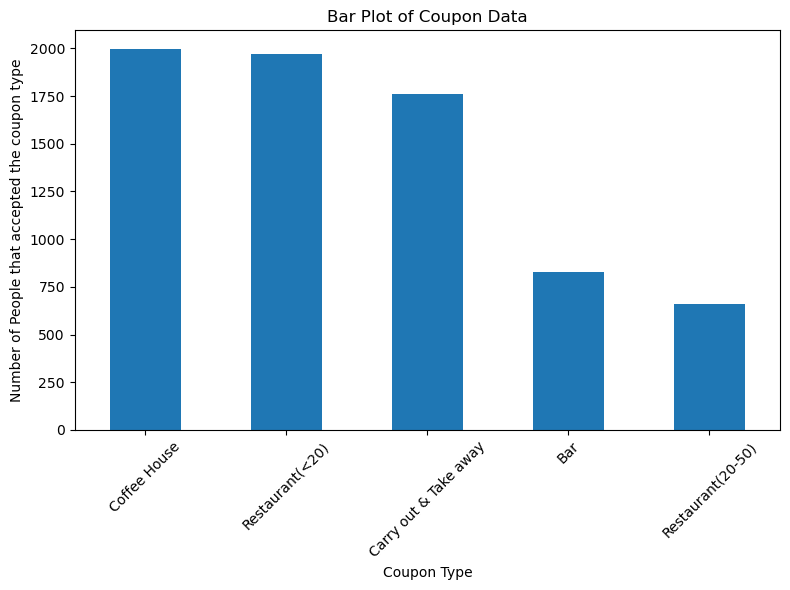

In [26]:

# Create a figure 
plt.figure(figsize=(8,6))

# Count the number of people that accepted each coupon type and create a bar plot 
data_accept['coupon'].value_counts().plot(kind='bar')

# Add labels and titles
plt.xlabel('Coupon Type')
plt.ylabel('Number of People that accepted the coupon type')
plt.title('Bar Plot of Coupon Data')

# Adjust the labels for the x axis
plt.xticks(rotation=45, ha = 'center')
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

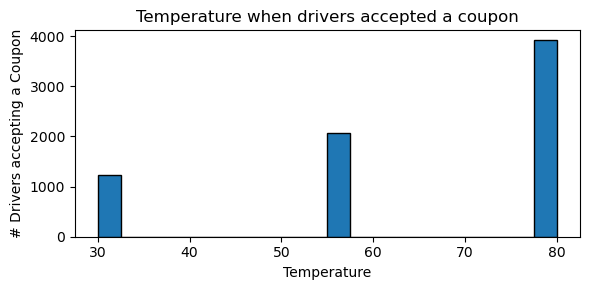

In [29]:
# Create a figure 
plt.figure(figsize=(6, 3))

# Get the temperature data and plot the graph
plt.hist(data_accept['temperature'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('# Drivers accepting a Coupon')
plt.title('Temperature when drivers accepted a coupon')

# Display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
# New Dataframe with just the Bar coupons data

data_bar = data_accept[data_accept['Bar'] != 'never'] 

data_bar['Bar'].value_counts()
#data_accept.shape[0] 

Bar
less1    1963
1~3      1538
4~8       686
gt8       201
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted: 34.59%



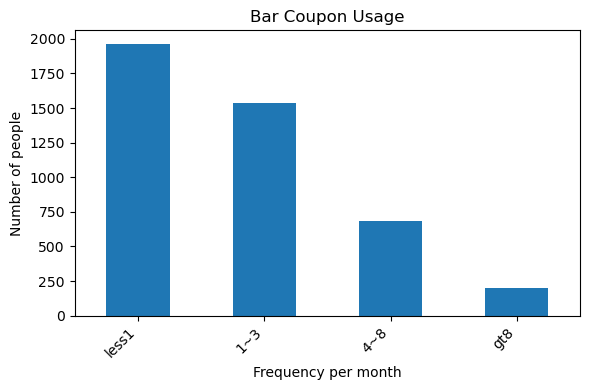

In [35]:
# Calculate the number of people that accepted the bar coupon by excluding people that never went to the bar
bar_accept = len(data_bar) 

# Calculate the proportion
bar_proportion = (bar_accept * 100) / data.shape[0]   

print(f"Proportion of bar coupons accepted: {bar_proportion:.2f}%")
print("")
plt.figure(figsize=(6, 4))  
data_bar['Bar'].value_counts().plot(kind='bar')
plt.title('Bar Coupon Usage')
plt.xlabel('Frequency per month')
plt.ylabel('Number of people') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [38]:
### Count accepted bar coupons of those who went to a bar 3 or fewer times
df_bar_3or_less = data_bar.query('Bar in ("1~3", "less1")')
bar_3or_less = len(df_bar_3or_less)

df_bar_4or_more = data_bar.query('Bar in ("4~8", "gt8")')
bar_4or_more = len(df_bar_4or_more)

proportion_3orless =  (bar_3or_less * 100)/ bar_accept
proportion_4ormore =  (bar_4or_more * 100)/ bar_accept


print("")
print("Proportion of people that acccepted a coupon and visited a Bar:")
print(f"3 times or less a month: {proportion_3orless:.2f}%")
print(f"More than 3 times a month: {proportion_4ormore:.2f}%")



Proportion of people that acccepted a coupon and visited a Bar:
3 times or less a month: 79.79%
More than 3 times a month: 20.21%


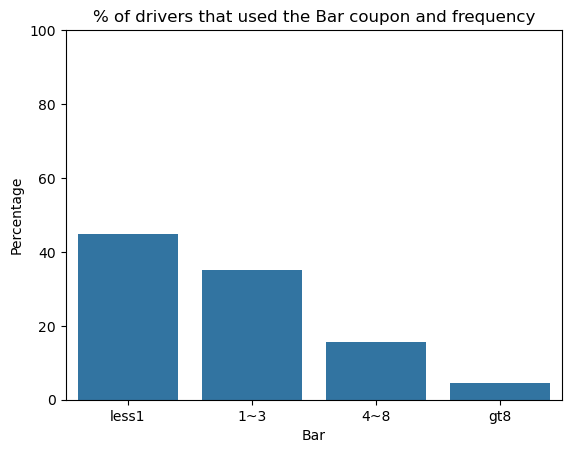

In [40]:
counts = data_bar['Bar'].value_counts(normalize=True) * 100
plt.ylim(0, 100)
sns.barplot(x=counts.index, y=counts.values)
plt.title('% of drivers that used the Bar coupon and frequency')
plt.ylabel('Percentage')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
# Revision: Problem 4: The current phrasing compares drivers who go to a bar “more than once a month” to all others. 
#However, for consistency with Problem 3, we might consider revising this to "more than 3 times a month" (or "once or more" if the intent is to include those who go exactly once). I’ll double-check the dataset to confirm whether “more than once” is accurately distinguishable.

#Problem 5: I see your concern about defining the comparison groups. To clarify, this problem compares drivers who (1) go 
#to bars more than once a month, (2) had passengers that were not a kid, and (3) had occupations other than farming, fishing, or forestry. If consistency with Problem 3 is needed, we could adjust "more than once a month" to "more than 3 times a month" or explicitly state that we are considering those who go at least once a month. I'll verify this point and update accordingly.

#Problem 6: Your suggestion makes sense—"4 times or more" would align better with standard phrasing. 
#I will review this and make necessary adjustments after consulting the team.
    

#Get the age values
data_bar['age'].value_counts()


age
21         1108
26         1025
31          726
41          446
50plus      429
36          395
46          174
below21      85
Name: count, dtype: int64

In [45]:
# Get the counts for every group Under 25 and Over 25

df_bar_3or_less_over25 = data_bar.query('(Bar in ("1~3", "less1")) and (age not in ("below21", "21"))')
df_bar_3or_less_under25 = data_bar.query('(Bar in ("1~3", "less1")) and (age in ("below21", "21"))')

df_bar_4or_more_over25 = data_bar.query('(Bar in ("4~8", "gt8")) and (age not in ("below21", "21"))')
df_bar_4or_more_under25 = data_bar.query('(Bar in ("4~8", "gt8")) and (age in ("below21", "21"))')

bar_3or_less_over25 = len(df_bar_3or_less_over25)
bar_3or_less_under25 = len(df_bar_3or_less_under25)
bar_4or_more_under25 = len(df_bar_4or_more_over25)
bar_4or_more_over25 = len(df_bar_4or_more_under25)

In [47]:
# Calculate the proportions

p_3or_less_over = (bar_3or_less_over25 * 100 / bar_accept)
p_3or_less_under = (bar_3or_less_under25 * 100 / bar_accept)
p_4or_more_over = (bar_4or_more_over25 * 100 / bar_accept)
p_4or_more_under = (bar_4or_more_under25 * 100 / bar_accept)

print("Percentage of Drivers that accepted a coupon and visited a Bar")
print("Over the Age of 25:")
print(f"3 times or less a month: {p_3or_less_over:.2f}%")
print(f"4 times or more a month: {p_4or_more_over:.2f}%")
print(" ")
print("Under the Age of 25:")
print(f"3 times or less a month: {p_3or_less_under:.2f}%")
print(f"4 times or more a month: {p_4or_more_under:.2f}%")

Percentage of Drivers that accepted a coupon and visited a Bar
Over the Age of 25:
3 times or less a month: 58.66%
4 times or more a month: 6.06%
 
Under the Age of 25:
3 times or less a month: 21.13%
4 times or more a month: 14.15%


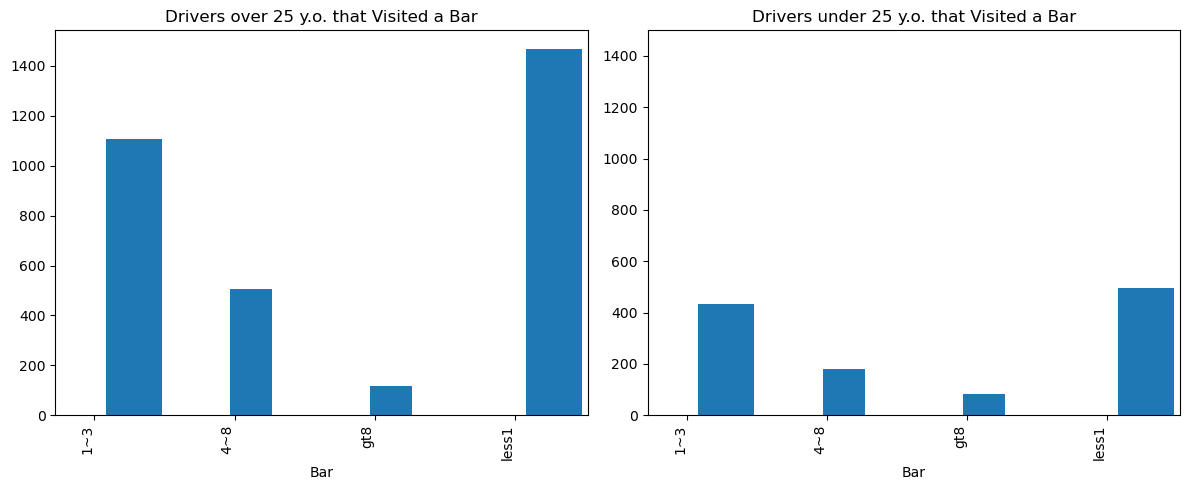

In [49]:
#Graph the results for both groups : Under 25 and Over 25

def plot_grouped_bar_charts(df_bar_3or_less_over25, df_bar_4or_more_over25,
                             df_bar_3or_less_under25, df_bar_4or_more_under25):

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.ylim(0, 1500)

    # Group 1: Over 25 years old
    categories_over25 = sorted(list(set(df_bar_3or_less_over25['Bar'].unique()) | set(df_bar_4or_more_over25['Bar'].unique())))
    axes[0].set_xticks(range(len(categories_over25)))
    axes[0].set_xticklabels(categories_over25, rotation=45, ha='right')

    df_bar_3or_less_over25['Bar'].value_counts().reindex(categories_over25).plot(kind='bar', 
            ax=axes[0], title='Drivers over 25 y.o. that Visited a Bar', position=-0.2, width=0.4)
    df_bar_4or_more_over25['Bar'].value_counts().reindex(categories_over25).plot(kind='bar', 
            ax=axes[0], position=0.1, width=0.3)

    # Group 2: Under 25 years old
    categories_under25 = sorted(list(set(df_bar_3or_less_under25['Bar'].unique()) | set(df_bar_4or_more_under25['Bar'].unique())))
    axes[1].set_xticks(range(len(categories_under25)))
    axes[1].set_xticklabels(categories_under25, rotation=45, ha='right')

    df_bar_3or_less_under25['Bar'].value_counts().reindex(categories_under25).plot(kind='bar', 
            ax=axes[1], title='Drivers under 25 y.o. that Visited a Bar', position=-0.2, width=0.4)
    df_bar_4or_more_under25['Bar'].value_counts().reindex(categories_under25).plot(kind='bar', 
            ax=axes[1], position=0.1, width=0.3)

    plt.tight_layout()
    plt.show()

plot_grouped_bar_charts(df_bar_3or_less_over25, df_bar_4or_more_over25, df_bar_3or_less_under25, df_bar_4or_more_under25)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [52]:
#Get the unique values and counts for the passenger attribute
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [54]:
# Drivers who go to bars more than once a month and whose passengers are not kids and their occupations are not farming, fishing or forestry

df_group5 = data_bar.query('(Bar in ("1~3", "4~8", "gt8")) and (passanger not in ("Kid(s)")) and (occupation not in ("farming", "fishing", "forestry"))')
group5 = len(df_group5)
group5_rate = (group5 * 100 / bar_accept)

print("Acceptance rate of drivers who went to bars once a month or more, didn't have kids, and their occupation is different than")
print("farming, fishing, forestry")
print(f"Rate: {group5_rate:.2f}%")

Acceptance rate of drivers who went to bars once a month or more, didn't have kids, and their occupation is different than
farming, fishing, forestry
Rate: 52.48%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
data_bar['age'].value_counts()

age
21         1108
26         1025
31          726
41          446
50plus      429
36          395
46          174
below21      85
Name: count, dtype: int64

In [59]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [61]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [63]:
df_group6a = data_bar.query('(Bar in ("1~3", "4~8", "gt8")) and (passanger not in ("Kid(s)")) and (maritalStatus not in ("widowed"))')
df_group6b = data_bar.query('(Bar in ("1~3", "4~8", "gt8")) and (age in ("below21", "21", "26")) and (maritalStatus not in ("widowed"))')
df_group6c = data_bar.query('(RestaurantLessThan20 in ("4~8", "gt8")) and (income in ("$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"))')
df_group6d = data_bar.query('(RestaurantLessThan20 in ("4~8", "gt8")) and (income not in ("$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"))')

group6a = len(df_group6a) 
group6b = len(df_group6b)
group6c = len(df_group6c)
group6d = len(df_group6d)

p6a = (group6a * 100) / bar_accept
p6b = (group6b * 100) / bar_accept
p6c = (group6c * 100) / bar_accept
p6d = (group6d * 100) / bar_accept



In [65]:
print("")
print("Acceptance Rates:")
print(f"People that go to bars more than once a month, had passengers that were not kids and were not widowed: {p6a:.2f}%")
print(f"People that went to the bar more than once a month and are under 30: {p6b:.2f}%")
print(f"People that go to cheap restaurants more than 4 times a month and income is less than 50K: {p6c:.2f}%")
print(f"People that go to cheap restaurants more than 4 times a month and income is greater than 50K: {p6d:.2f}%")



Acceptance Rates:
People that go to bars more than once a month, had passengers that were not kids and were not widowed: 52.48%
People that went to the bar more than once a month and are under 30: 32.52%
People that go to cheap restaurants more than 4 times a month and income is less than 50K: 19.05%
People that go to cheap restaurants more than 4 times a month and income is greater than 50K: 24.77%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

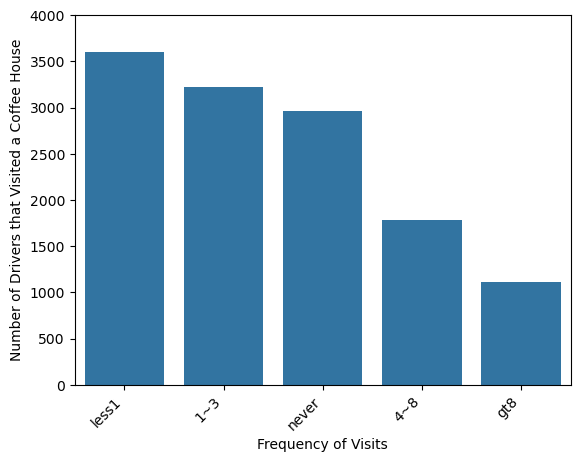

In [69]:
#Plot the Income attribute
counts = data['CoffeeHouse'].value_counts()
plt.ylim(0, 4000)
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45, ha='right') 

plt.xlabel('Frequency of Visits')
plt.ylabel('Number of Drivers that Visited a Coffee House')
plt.show()

In [71]:
df_group7a = data_accept.query('(CoffeeHouse in ("1~3", "4~8", "gt8")) and (age in ("below21", "21", "26"))')
df_group7b = data_accept.query('(CoffeeHouse in ("1~3", "4~8", "gt8")) and (age not in ("below21", "21", "26"))')

df_group7c = data_accept.query('(CoffeeHouse in ("1~3", "4~8", "gt8")) and (income in ("$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"))')
df_group7d = data_accept.query('(CoffeeHouse in ("1~3", "4~8", "gt8")) and (income not in ("$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"))')

group7a = len(df_group7a) 
group7b = len(df_group7b)
group7c = len(df_group7c)
group7d = len(df_group7d)

p7a = (group7a * 100) / accepted_coupon
p7b = (group7b * 100) / accepted_coupon
p7c = (group7c * 100) / accepted_coupon
p7d = (group7d * 100) / accepted_coupon

print ("Acceptance rate of Coffee House coupon by drivers that visited at least once a month in the following categories:")
print(f"Under 30 y.o: {p7a:.2f}%")
print(f"Over 30 y.o:  {p7b:.2f}%")
print("")
print(f"Income Under $50K: {p7c:.2f}%")
print(f"Income Over $50K: {p7d:.2f}%")


Acceptance rate of Coffee House coupon by drivers that visited at least once a month in the following categories:
Under 30 y.o: 27.84%
Over 30 y.o:  26.07%

Income Under $50K: 29.04%
Income Over $50K: 24.87%
